# Introduction to kNN in Python

This is a new classroom activity for **October 11**, based on **slide deck 9**.

Note that you will have another activity due on that day, which has to do with the next slide deck.

## Instructions
- Create a Google Colab file (extension `.ipynb`) that implements any kNN analysis in Python. You may copy parts of all the code in the previous slides if you like.
- Name your file with the date (format: YYYYMMDD), underscore, the last name, and the .ipynb extension (for example, `20221011_jacobmachado.ipynb`)

## Challenge (optional)

The challenge is optional.

Instructions:

- Add another example using a dataset that is not the abalone
data.
- Make sure it is an example of a kNN implementation in
bioinformatics.

## Source

This Colab is based on the article named "**The k-Nearest Neighbors (kNN) Algorithm in Python**," authored by Joos Korstanje, and published at https://realpython.com/knn-python/ (last accessed: September 23, 2022).

In [ ]:
# We will use physical measures from abalones.
import pandas as pd
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)
abalone.head()

0      1      2      3       4       5       6      7   8
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7

In [ ]:
# Name the features
abalone.columns = [
"Sex",
"Length",
"Diameter",
"Height",
"Whole weight",
"Shucked weight",
"Viscera weight",
"Shell weight",
"Rings",
]
abalone.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [ ]:
# Drop "Sex" because it is not a physical feature
abalone = abalone.drop("Sex", axis=1)
abalone.head()

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

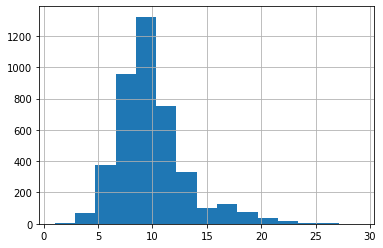

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=15)
plt.show()

In [ ]:
# Additional exploration using correlations
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [ ]:
# Get X and Y variables for the kNN algorithm
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

array([15,  7,  9, ...,  9, 10, 12])

In [ ]:
# Set up a new, made up datapoint for testing
import numpy as np
new_data_point = np.array([
0.569552, # Length
0.446407, # Diameter
0.154437, # Height
1.016849, # Whole weight
0.439051, # shucked weight
0.222526, # Viscera weight
0.291208  # Shell weight
])
new_data_point

array([0.569552, 0.446407, 0.154437, 1.016849, 0.439051, 0.222526,
       0.291208])

In [ ]:
# Compute distances and find the kNNs with k = 3
distances = np.linalg.norm(X - new_data_point, axis=1)
k= 3
nearest_neighbor_ids = distances.argsort()[:k]
print("These are the IDs of the nearest neighbors in the 'model': {}".format(nearest_neighbor_ids))
nearest_neighbor_rings = y[nearest_neighbor_ids]
print("These are the ring values of the nearest neighbors in the 'model': {}".format(nearest_neighbor_rings))
prediction = nearest_neighbor_rings.mean()
print("This is the predicted mean: {}".format(prediction))

These are the IDs of the nearest neighbors in the 'model': [4045 1902 1644]
These are the ring values of the nearest neighbors in the 'model': [ 9 11 10]
This is the predicted mean: 10.0


In [ ]:
# Split the dataset and run some preliminary kNN with k = 3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors = 3)
knn_model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
from math import sqrt
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
print("The MSE is {}".format(mse))
rmse = sqrt(mse)
print("The RMSE is {}".format(rmse))

The MSE is 5.642610313662946
The RMSE is 2.375417924000521


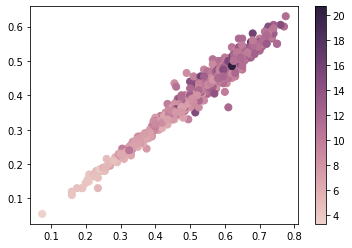

In [ ]:
# Visualize the kNN using test_preds
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

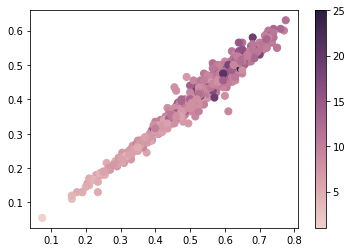

In [ ]:
# Visualize the kNN using y_test
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

In [ ]:
# Optimizing kNN with scikit-learn and GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50), "weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
print("The RMSE is {}".format(test_rmse))


The RMSE is 2.1634265584947485


In [ ]:
# Create the KNeighborsRegressor with the best choices for k and weights that you got from GridSearchCV
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors = best_k, weights = best_weights)

In [ ]:
# Import the BaggingRegressor class from scikit-learn and create a new instance with 100 estimators using the bagged_knn model
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

In [ ]:
# We will need to 'fit' the 'model' in preparation for the next steps
bagging_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=25,
                                                    weights='distance'),
                 n_estimators=100)

In [ ]:
# Make a prediction and calculate the RMSE after bagging
test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
print("This is the RMSE: {}".format(test_rmse))

This is the RMSE: 2.1622520755346883
